## Keras and Tensorflow library are used

In [1]:
! pip install tensorflow

In [2]:
! pip install keras

In [3]:
from keras.models import Sequential
from keras.layers import Dense

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [5]:
gas_data=pd.read_csv("C:\\Users\\Rahul\\Downloads\\gas_turbines.csv")
gas_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


### Here the variable to predict is TEY 

## Data understanding

In [6]:
gas_data.shape

(15039, 11)

In [7]:
gas_data.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [8]:
gas_data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [9]:
gas_data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


-0.030710466602760514

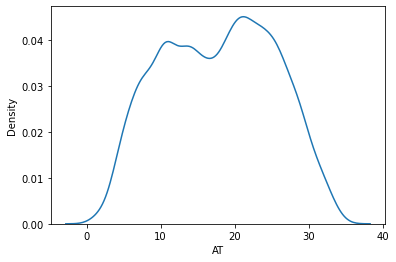

In [10]:
sns.distplot(a=gas_data['AT'],hist=False)
gas_data['AT'].skew()

## Scaling down the data

In [11]:
#from sklearn.preprocessing import MinMaxScaler
#minmaxscalar=MinMaxScaler()
#gas_data_scaled=minmaxscalar.fit_transform(gas_data)
#gas_data_scaled=pd.DataFrame(gas_data_scaled,columns=gas_data.columns)

In [12]:
gas_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


## splitting the data into input and output

In [13]:
X=gas_data.drop('TEY',axis=1)
Y=gas_data[['TEY']]

In [14]:
X.shape,Y.shape

((15039, 10), (15039, 1))

In [15]:
X.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311


In [16]:
Y.head()

,TEY
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72


## Model Buliding

### since there are 10 input parameters we require 10 neurons in input layer and one neuron in output layer

In [17]:
model = Sequential()
model.add(Dense(50, input_dim=10, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='relu'))
model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                550       
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,851
Trainable params: 1,851
Non-trainable params: 0
_________________________________________________________________


## Model Training

In [18]:
history=model.fit(X,Y,validation_split=0.25,epochs=250,batch_size=1000)

Epoch 1/250
12/12 [==============================] - 1s 19ms/step - loss: 18507.7793 - mse: 18507.7793 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 2/250
12/12 [==============================] - 0s 5ms/step - loss: 18507.7773 - mse: 18507.7773 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 3/250
12/12 [==============================] - 0s 5ms/step - loss: 18507.7773 - mse: 18507.7773 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 4/250
12/12 [==============================] - 0s 5ms/step - loss: 18507.7754 - mse: 18507.7754 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 5/250
12/12 [==============================] - 0s 5ms/step - loss: 18507.7793 - mse: 18507.7793 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 6/250
12/12 [==============================] - 0s 5ms/step - loss: 18507.7754 

12/12 [==============================] - 0s 5ms/step - loss: 18507.7773 - mse: 18507.7773 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 46/250
12/12 [==============================] - 0s 4ms/step - loss: 18507.7773 - mse: 18507.7773 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 47/250
12/12 [==============================] - 0s 4ms/step - loss: 18507.7773 - mse: 18507.7773 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 48/250
12/12 [==============================] - 0s 4ms/step - loss: 18507.7773 - mse: 18507.7773 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 49/250
12/12 [==============================] - 0s 4ms/step - loss: 18507.7773 - mse: 18507.7773 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 50/250
12/12 [==============================] - 0s 4ms/step - loss: 18507.7754 - mse: 1

12/12 [==============================] - 0s 4ms/step - loss: 18507.7793 - mse: 18507.7793 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 90/250
12/12 [==============================] - 0s 5ms/step - loss: 18507.7793 - mse: 18507.7793 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 91/250
12/12 [==============================] - 0s 5ms/step - loss: 18507.7754 - mse: 18507.7754 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 92/250
12/12 [==============================] - 0s 5ms/step - loss: 18507.7773 - mse: 18507.7773 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 93/250
12/12 [==============================] - 0s 5ms/step - loss: 18507.7793 - mse: 18507.7793 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 94/250
12/12 [==============================] - 0s 5ms/step - loss: 18507.7773 - mse: 1

12/12 [==============================] - 0s 5ms/step - loss: 18507.7754 - mse: 18507.7754 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 134/250
12/12 [==============================] - 0s 4ms/step - loss: 18507.7793 - mse: 18507.7793 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 135/250
12/12 [==============================] - 0s 5ms/step - loss: 18507.7773 - mse: 18507.7773 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 136/250
12/12 [==============================] - 0s 4ms/step - loss: 18507.7793 - mse: 18507.7793 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 137/250
12/12 [==============================] - 0s 4ms/step - loss: 18507.7773 - mse: 18507.7773 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 138/250
12/12 [==============================] - 0s 4ms/step - loss: 18507.7793 - m

12/12 [==============================] - 0s 4ms/step - loss: 18507.7754 - mse: 18507.7754 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 178/250
12/12 [==============================] - 0s 4ms/step - loss: 18507.7773 - mse: 18507.7773 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 179/250
12/12 [==============================] - 0s 5ms/step - loss: 18507.7773 - mse: 18507.7773 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 180/250
12/12 [==============================] - 0s 5ms/step - loss: 18507.7793 - mse: 18507.7793 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 181/250
12/12 [==============================] - 0s 5ms/step - loss: 18507.7773 - mse: 18507.7773 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 182/250
12/12 [==============================] - 0s 5ms/step - loss: 18507.7734 - m

12/12 [==============================] - 0s 5ms/step - loss: 18507.7773 - mse: 18507.7773 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 222/250
12/12 [==============================] - 0s 5ms/step - loss: 18507.7793 - mse: 18507.7793 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 223/250
12/12 [==============================] - 0s 5ms/step - loss: 18507.7793 - mse: 18507.7793 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 224/250
12/12 [==============================] - 0s 5ms/step - loss: 18507.7793 - mse: 18507.7793 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 225/250
12/12 [==============================] - 0s 5ms/step - loss: 18507.7793 - mse: 18507.7793 - mae: 135.1129 - val_loss: 17505.1641 - val_mse: 17505.1641 - val_mae: 131.4153
Epoch 226/250
12/12 [==============================] - 0s 5ms/step - loss: 18507.7793 - m

In [19]:
mse=model.evaluate(X,Y)
print(model.metrics_names[1],mse[1])

470/470 [==============================] - 1s 1ms/step - loss: 18257.1094 - mse: 18257.1094 - mae: 134.1884
mse 18257.109375


In [20]:
history.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

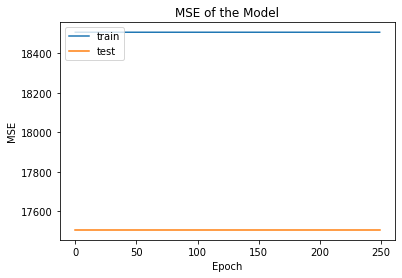

In [21]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('MSE of the Model')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(['train','test'],loc=u'upper left')
plt.show()

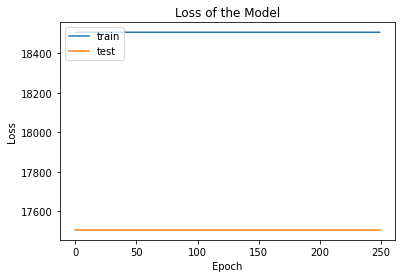

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of the Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','test'],loc=u'upper left')
plt.show()